# Analyse temperature distributions arising from infilled data


In [1]:
import numpy as np
import pandas as pd
import pyam
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


Load the data that has been run by the climate assessment pipeline

In [2]:
folder = "../../iiasa-climate-assessement/output/only_run_magicc/"
all_data = pyam.IamDataFrame(folder + "all_variables_complete_sr15_EQW_infilled_alloutput.xlsx")
infilled_qrw = pyam.IamDataFrame(folder + "co2_of_complete_sr15_infilledwith_QRW_alloutput.xlsx")
infilled_eqw = pyam.IamDataFrame(folder + "co2_of_complete_sr15_infilledwith_EQW_alloutput.xlsx")
infilled_rms = pyam.IamDataFrame(folder + "co2_of_complete_sr15_infilledwith_RMS closest_alloutput.xlsx")
infilled_ch4_qrw = pyam.IamDataFrame(folder + "co2_and_ch4_of_complete_sr15_infilledwith_QRW_alloutput.xlsx")
infilled_ch4_eqw = pyam.IamDataFrame(folder + "co2_and_ch4_of_complete_sr15_infilledwith_EQW_alloutput.xlsx")
infilled_ch4_rms = pyam.IamDataFrame(folder + "co2_and_ch4_of_complete_sr15_infilledwith_RMS_closest_alloutput.xlsx")

pyam.core - INFO: Reading file `../../iiasa-climate-assessement/output/only_run_magicc/all_variables_complete_sr15_EQW_infilled_alloutput.xlsx`
pyam.core - INFO: Importing meta indicators for 47 scenarios (for total of 47)
pyam.core - INFO: Reading file `../../iiasa-climate-assessement/output/only_run_magicc/co2_of_complete_sr15_infilledwith_QRW_alloutput.xlsx`
pyam.core - INFO: Importing meta indicators for 46 scenarios (for total of 46)
pyam.core - INFO: Reading file `../../iiasa-climate-assessement/output/only_run_magicc/co2_of_complete_sr15_infilledwith_EQW_alloutput.xlsx`
pyam.core - INFO: Importing meta indicators for 46 scenarios (for total of 46)
pyam.core - INFO: Reading file `../../iiasa-climate-assessement/output/only_run_magicc/co2_of_complete_sr15_infilledwith_RMS closest_alloutput.xlsx`
pyam.core - INFO: Importing meta indicators for 46 scenarios (for total of 46)
pyam.core - INFO: Reading file `../../iiasa-climate-assessement/output/only_run_magicc/co2_and_ch4_of_complet

In [32]:
infilled_qrw_02 = pyam.IamDataFrame(folder + "co2_of_complete_sr15_infilledwith_QRW_02_alloutput.xlsx")
infilled_qrw_08 = pyam.IamDataFrame(folder + "co2_of_complete_sr15_infilledwith_QRW_08_alloutput.xlsx")

pyam.core - INFO: Reading file `../../iiasa-climate-assessement/output/only_run_magicc/co2_of_complete_sr15_infilledwith_QRW_02_alloutput.xlsx`
pyam.core - INFO: Importing meta indicators for 46 scenarios (for total of 46)
pyam.core - INFO: Reading file `../../iiasa-climate-assessement/output/only_run_magicc/co2_of_complete_sr15_infilledwith_QRW_08_alloutput.xlsx`
pyam.core - INFO: Importing meta indicators for 46 scenarios (for total of 46)


Combine them for analysis. Since there is a lot of data, we remove non-decadal years.

In [3]:
all_data = all_data.filter(model="MESSAGEix-GLOBIOM 1.0", keep=False)  # This has no counterpart

In [33]:
all_data.data["infill"] = "Original"
infilled_qrw.data["infill"] = "CO2 QRW"
infilled_eqw.data["infill"] = "CO2 EQW"
infilled_rms.data["infill"] = "CO2 RMS"
infilled_ch4_qrw["infill"] = "CO2 and CH4 QRW"
infilled_ch4_eqw["infill"]  = "CO2 and CH4 EQW"
infilled_ch4_rms["infill"]  = "CO2 and CH4 RMS"
infilled_qrw_08.data["infill"] = "CO2 QRW 0.8"
infilled_qrw_02.data["infill"] = "CO2 QRW 0.2"
temp_comp = "AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.3.0|50.0th Percentile"
decades = range(2030, 2101, 10)
all_temp_infills = pd.concat(
    [
        all_data.filter(variable=temp_comp, year=decades).data,
        infilled_qrw.filter(variable=temp_comp, year=decades).data,
        infilled_eqw.filter(variable=temp_comp, year=decades).data,
        infilled_rms.filter(variable=temp_comp, year=decades).data,
        infilled_ch4_qrw.filter(variable=temp_comp, year=decades).data,
        infilled_ch4_eqw.filter(variable=temp_comp, year=decades).data,
        infilled_ch4_rms.filter(variable=temp_comp, year=decades).data,
    ]
)
all_qrw_infills = pd.concat(
    [
        all_data.filter(variable=temp_comp, year=decades).data,
        infilled_qrw.filter(variable=temp_comp, year=decades).data,
        infilled_qrw_08.filter(variable=temp_comp, year=decades).data,
        infilled_qrw_02.filter(variable=temp_comp, year=decades).data,
    ]
)

In [5]:
all_temp_infills

,model,scenario,region,variable,unit,year,value,infill
30011,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Surface Temperature (G...,K,2030,1.488071,Original
30021,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Surface Temperature (G...,K,2040,1.511421,Original
30031,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Surface Temperature (G...,K,2050,1.489883,Original
30041,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Surface Temperature (G...,K,2060,1.437450,Original
30051,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Surface Temperature (G...,K,2070,1.381107,Original
...,...,...,...,...,...,...,...,...
1410011,REMIND-MAgPIE 1.7-3.0,SMP_REF_Sust,World,AR6 climate diagnostics|Surface Temperature (G...,K,2060,2.587096,CO2 and CH4 RMS
1410021,REMIND-MAgPIE 1.7-3.0,SMP_REF_Sust,World,AR6 climate diagnostics|Surface Temperature (G...,K,2070,2.911395,CO2 and CH4 RMS
1410031,REMIND-MAgPIE 1.7-3.0,SMP_REF_Sust,World,AR6 climate diagnostics|Surface Temperature (G...,K,2080,3.173107,CO2 and CH4 RMS
1410041,REMIND-MAgPIE 1.7-3.0,SMP_REF_Sust,World,AR6 climate diagnostics|Surface Temperature (G...,K,2090,3.405919,CO2 and CH4 RMS


In [6]:
all_temp_infills["year"].unique()

array([2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100], dtype=int64)

In [7]:
all_temp_infills["model"].unique()

array(['AIM/CGE 2.1', 'IMAGE 3.0.1', 'REMIND 1.7',
       'REMIND-MAgPIE 1.7-3.0'], dtype=object)

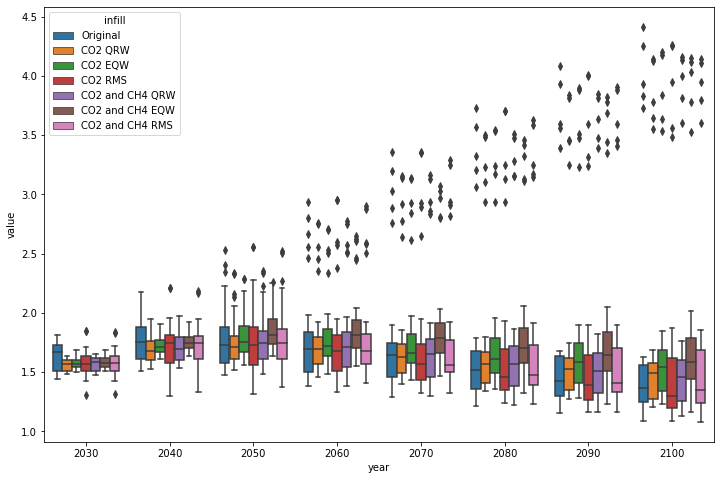

In [8]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.boxplot(data=all_temp_infills, x="year", y="value", hue="infill")

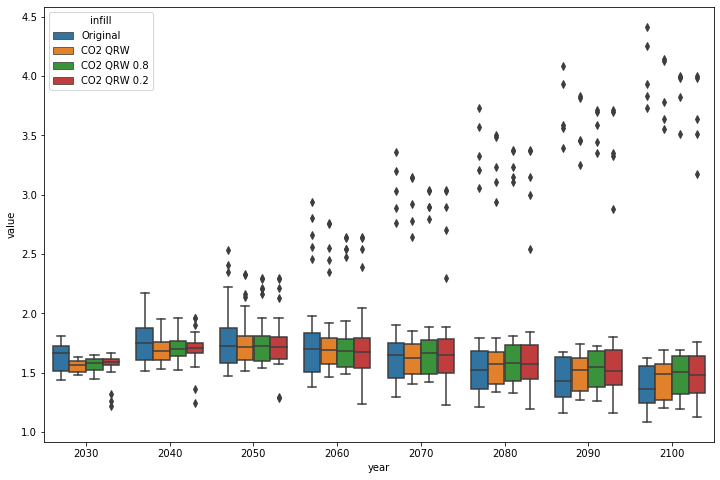

In [35]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.boxplot(data=all_qrw_infills, x="year", y="value", hue="infill")

In [9]:
temp_df = all_temp_infills.pivot(
    index=["model", "scenario", "year", "region", "unit", "variable"], columns="infill", values="value"
)

In [10]:
temp_df.describe()

infill,CO2 EQW,CO2 QRW,CO2 RMS,CO2 and CH4 EQW,CO2 and CH4 QRW,CO2 and CH4 RMS,Original
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,1.748921,1.697054,1.693247,1.812086,1.707723,1.698522,1.712785
std,0.458728,0.465624,0.512561,0.445530,0.487824,0.506035,0.516459
min,1.232240,1.204345,1.084724,1.166642,1.130446,1.079261,1.084721
25%,1.548154,1.501892,1.426439,1.603050,1.491993,1.441148,1.464116
50%,1.653956,1.600587,1.582899,1.714203,1.611492,1.594110,1.622090
75%,1.774750,1.717166,1.778559,1.843253,1.756913,1.762574,1.766574
max,4.197977,4.143765,4.262509,4.147112,4.161977,4.142137,4.414488


In [11]:
for ind in range(len(temp_df.columns)):
    print(
        "for {}, correlation is {}".format(
        temp_df.columns[ind], str(np.polyfit(temp_df["Original"], temp_df[temp_df.columns[ind]], 1))
        )
    )

for CO2 EQW, correlation is [0.86444576 0.26831047]
for CO2 QRW, correlation is [0.88975197 0.1731    ]
for CO2 RMS, correlation is [0.94621407 0.07258554]
for CO2 and CH4 EQW, correlation is [0.82423795 0.40034305]
for CO2 and CH4 QRW, correlation is [0.93294236 0.10979278]
for CO2 and CH4 RMS, correlation is [0.94777032 0.07519456]
for Original, correlation is [1. 0.]


In [12]:
np.polyfit(temp_df["Original"], temp_df["CO2 QRW"], 1)

array([0.88975197, 0.1731    ])

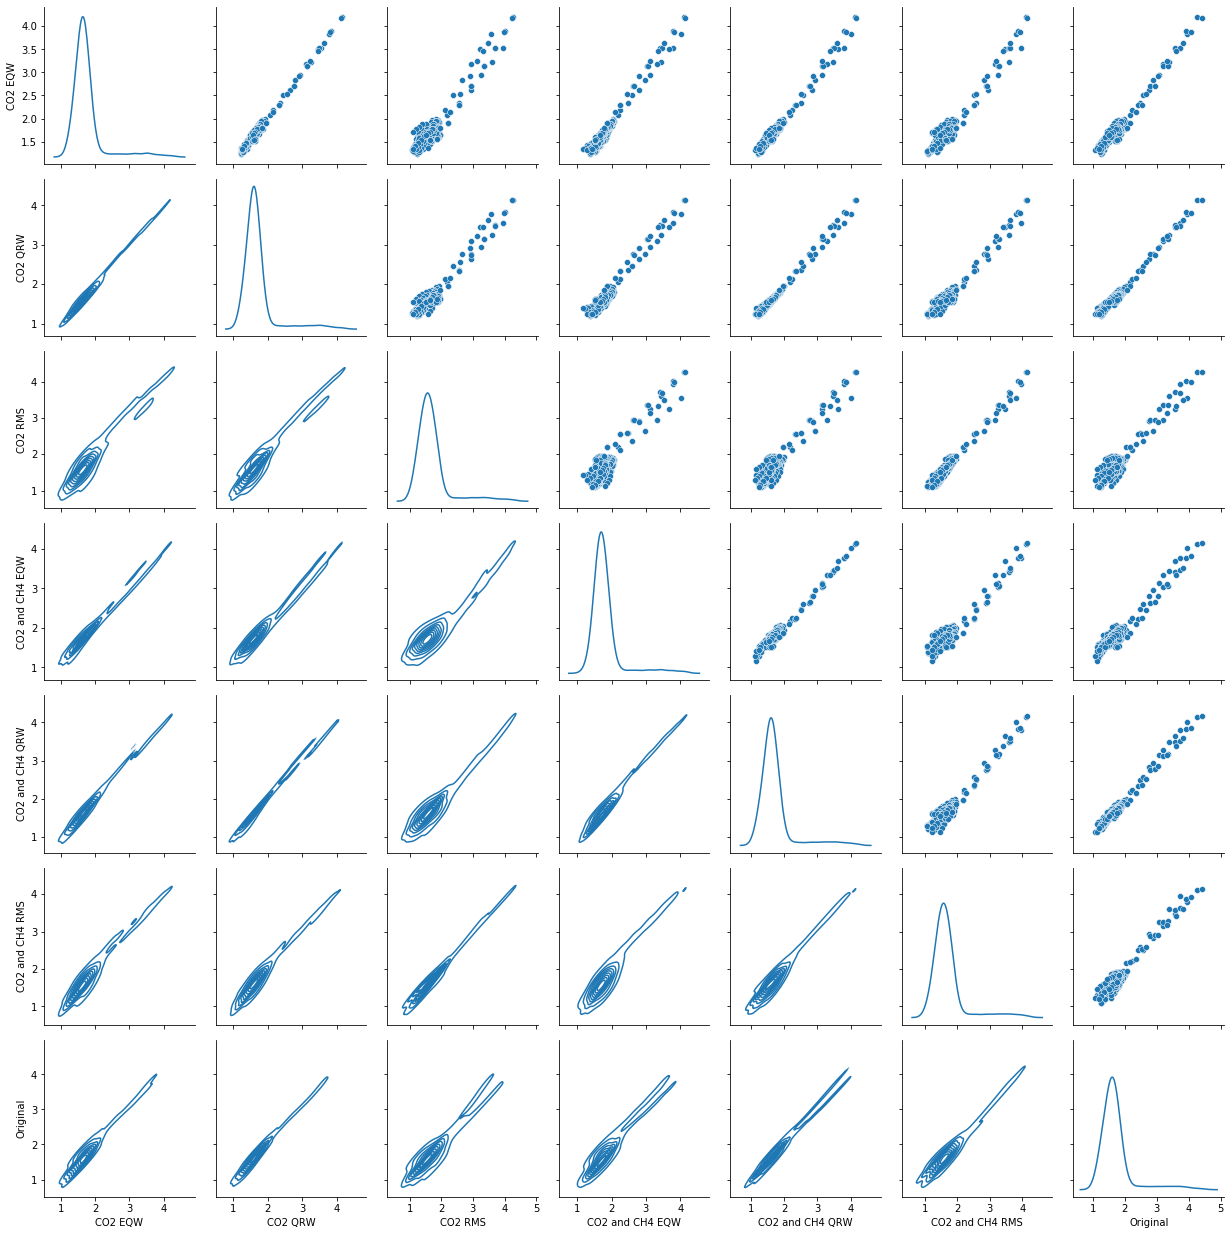

In [13]:
g = sns.PairGrid(temp_df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.kdeplot)

In [14]:
dif = {}
for col in temp_df.columns:
    if str(col) != "Original":
        dif[col + " - Original"] = temp_df[col] - temp_df["Original"]

In [15]:
dif_df = pd.DataFrame(data=dif)
dif_df

CO2 EQW - Original  \
model                 scenario                          year region unit variable                                                                 
AIM/CGE 2.1           TERL_15D_LowCarbonTransportPolicy 2030 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.083410   
                                                        2040 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.150082   
                                                        2050 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.175711   
                                                        2060 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.170206   
                                                        2070 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.182249   
...                                                                                                                                         ...   
REMIND-MAgPIE 1.7-3.0 SMP_REF_Sust                      2060 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.133567   
                                                        2070 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.103150   
                                                        2080 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.081778   
                                                        2090 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.116601   
                                                        2100 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.195495   

                                                                                                                             CO2 QRW - Original  \
model                 scenario                          year region unit variable                                                                 
AIM/CGE 2.1           TERL_15D_LowCarbonTransportPolicy 2030 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.015704   
                                                        2040 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.064001   
                                                        2050 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.085791   
                                                        2060 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.095583   
                                                        2070 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.100525   
...                                                                                                                                         ...   
REMIND-MAgPIE 1.7-3.0 SMP_REF_Sust                      2060 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.110439   
                                                        2070 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.106379   
                                                        2080 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.091695   
                                                        2090 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.129476   
                                                        2100 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.191864   

                                                                                                                             CO2 RMS - Original  \
model                 scenario                          year region unit variable                                                                 
AIM/CGE

In [16]:
dif_df.describe()

,CO2 EQW - Original,CO2 QRW - Original,CO2 RMS - Original,CO2 and CH4 EQW - Original,CO2 and CH4 QRW - Original,CO2 and CH4 RMS - Original
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,0.036135,-0.015731,-0.019538,0.099300,-0.005063,-0.014264
std,0.126550,0.094283,0.157104,0.159779,0.083754,0.131164
min,-0.272699,-0.290223,-0.440479,-0.307921,-0.252511,-0.341917
25%,-0.036140,-0.079590,-0.106768,0.005245,-0.039952,-0.124257
50%,0.039525,-0.018229,-0.026950,0.138219,0.000441,-0.014385
75%,0.134663,0.055187,0.060345,0.208363,0.041614,0.082093
max,0.282903,0.251886,0.477084,0.473584,0.216547,0.347860


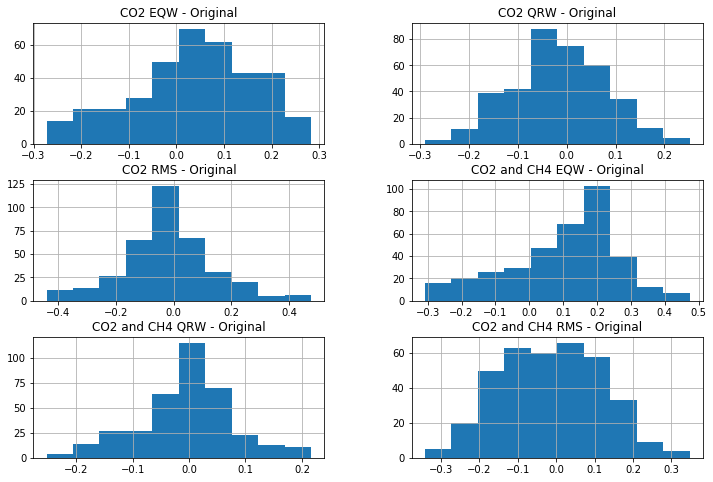

In [17]:
dif_df.hist()
fig = plt.gcf()
fig.set_size_inches(12, 8)

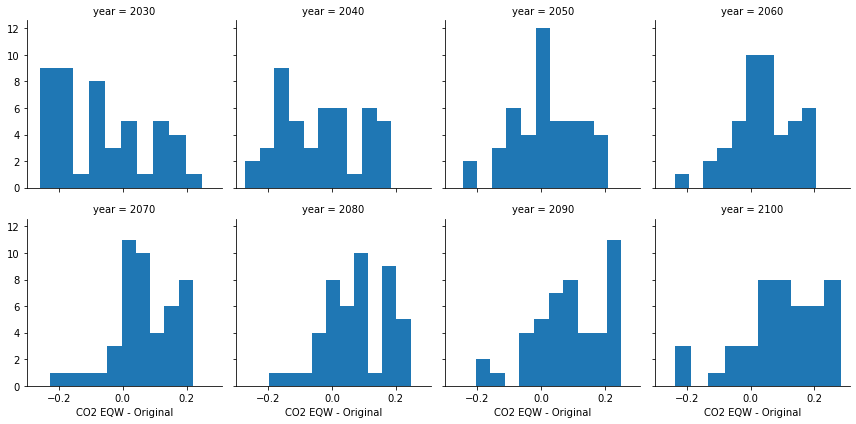

In [18]:
dif_df_full = dif_df.reset_index()
g = sns.FacetGrid(dif_df_full, col="year", col_wrap=4)
g = g.map(plt.hist, "CO2 EQW - Original")

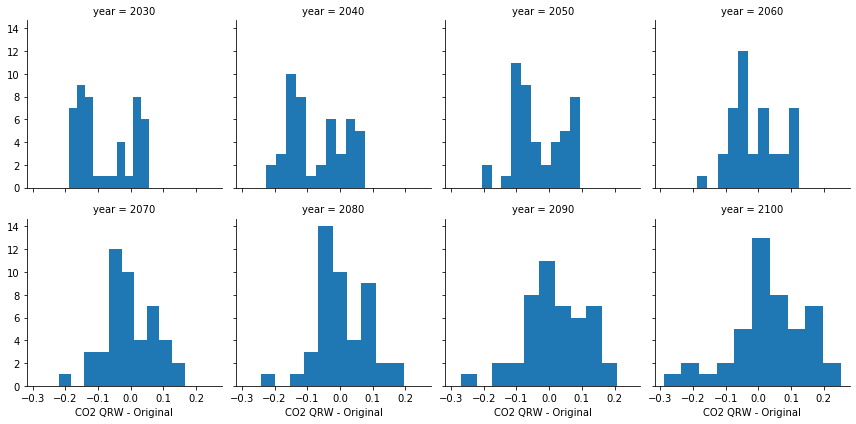

In [19]:
g = sns.FacetGrid(dif_df_full, col="year", col_wrap=4)
g = g.map(plt.hist, "CO2 QRW - Original")

In [20]:
for col in dif_df.columns:
    rms_error = np.mean(dif_df_full[col] ** 2) ** 0.5
    print(col + " RMS error is {}".format(rms_error))

CO2 EQW - Original RMS error is 0.13144223187040613
CO2 QRW - Original RMS error is 0.0954601405842456
CO2 RMS - Original RMS error is 0.15810251389095076
CO2 and CH4 EQW - Original RMS error is 0.18793790432791768
CO2 and CH4 QRW - Original RMS error is 0.08379338562819003
CO2 and CH4 RMS - Original RMS error is 0.13175967054416585


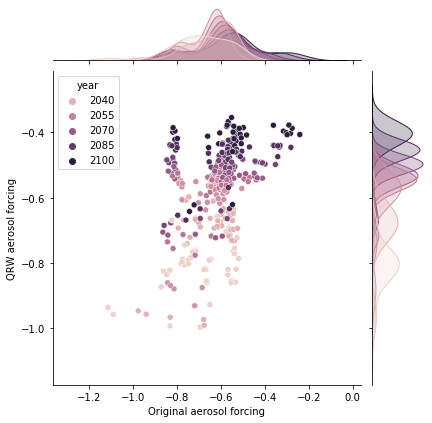

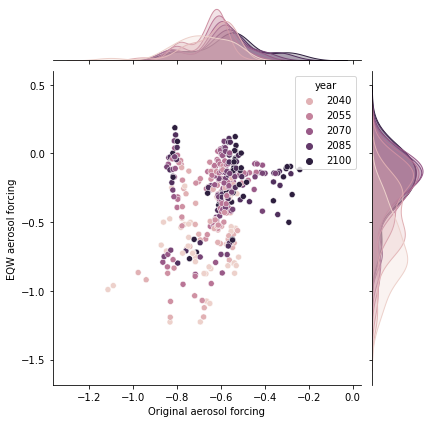

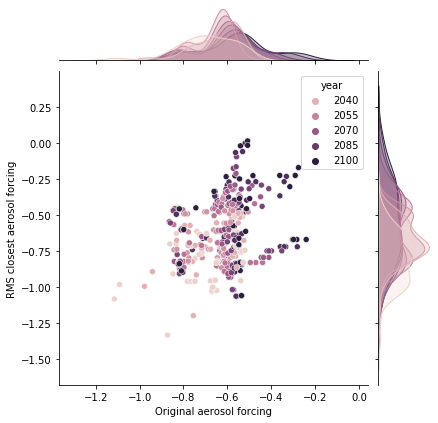

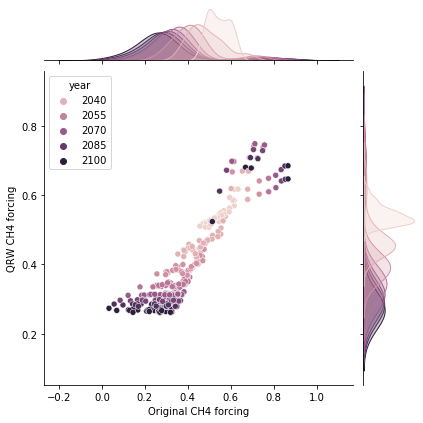

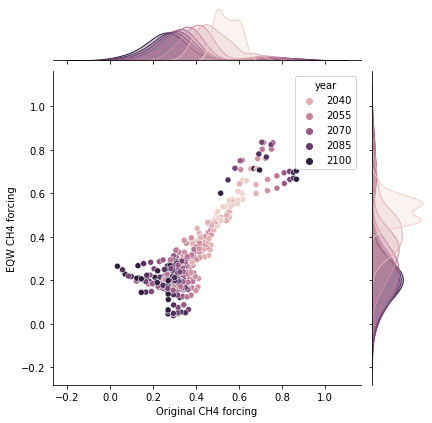

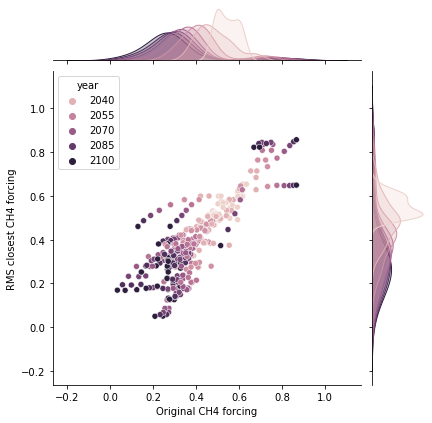

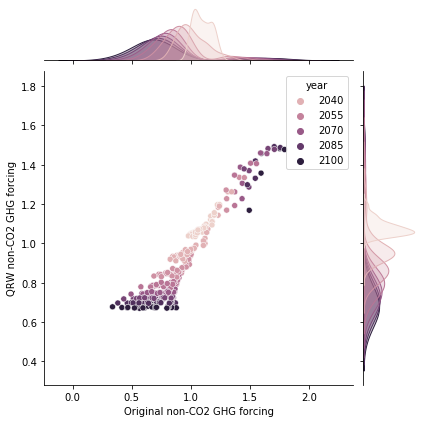

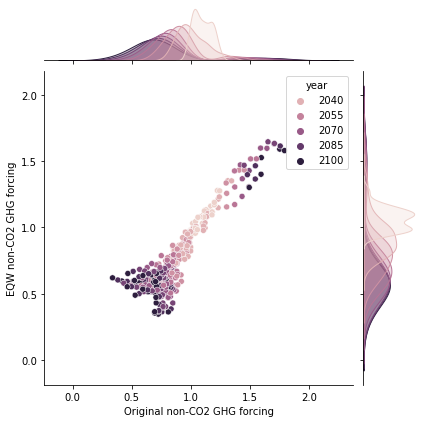

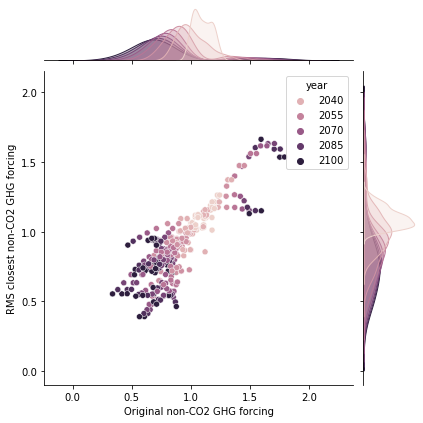

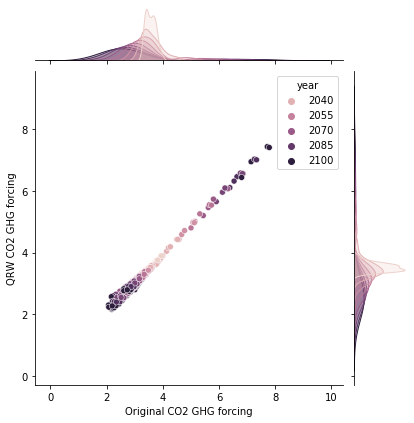

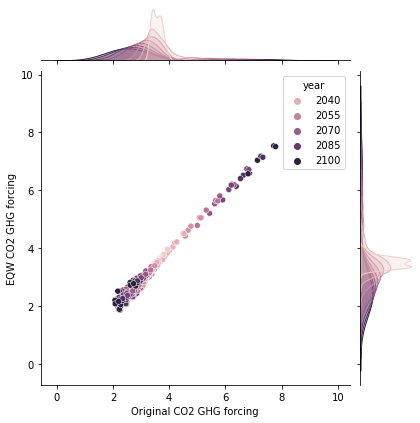

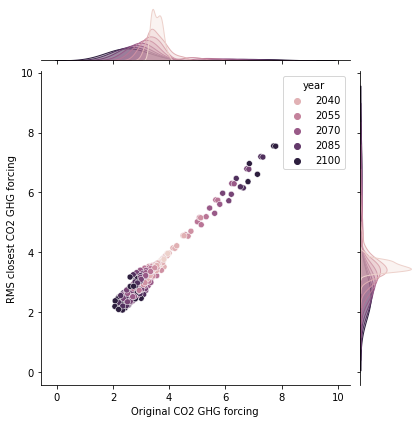

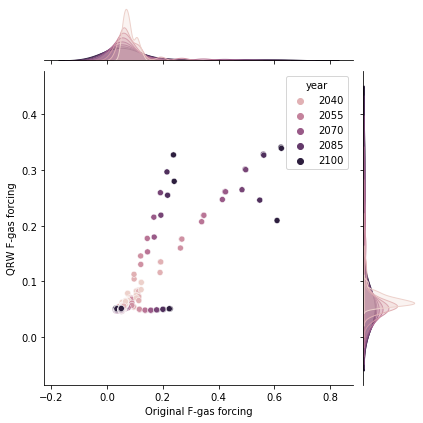

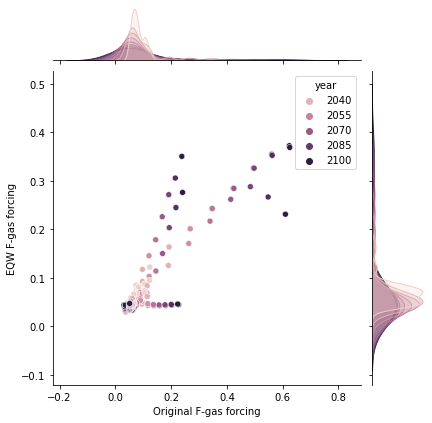

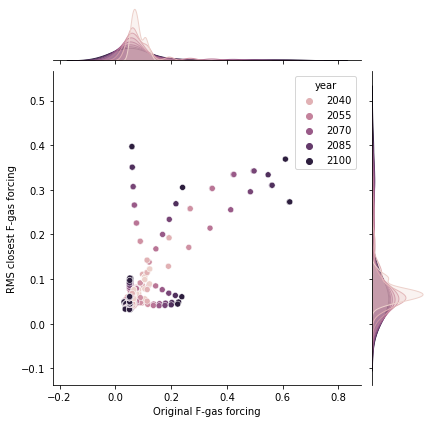

In [25]:
noninfill_cols = ['model', 'scenario', 'region', 'variable', 'unit', 'year']
to_plot_lst = [
    (" aerosol forcing", "AR6 climate diagnostics|Effective Radiative Forcing|Aerosols|MAGICCv7.3.0|50.0th Percentile"),
    (" CH4 forcing", "AR6 climate diagnostics|Effective Radiative Forcing|CH4|MAGICCv7.3.0|50.0th Percentile"),
    (" non-CO2 GHG forcing", "AR6 climate diagnostics|Effective Radiative Forcing|Non-CO2 Greenhouse Gases|MAGICCv7.3.0|50.0th Percentile"),
    (" CO2 GHG forcing", "AR6 climate diagnostics|Effective Radiative Forcing|Greenhouse Gases|MAGICCv7.3.0|50.0th Percentile"),
    (" F-gas forcing", "AR6 climate diagnostics|Effective Radiative Forcing|F Gases|MAGICCv7.3.0|50.0th Percentile")
]
for aerforce, aerosols_effect in to_plot_lst:
    plot_filter = {"variable": aerosols_effect, "year": decades}
    to_plot_data = all_data.filter(**plot_filter).data.merge(
        infilled_qrw.filter(**plot_filter).data, on=noninfill_cols, suffixes=["_all", "_qrw"]
    ).merge(
        infilled_eqw.filter(**plot_filter).data, on=noninfill_cols
    ).merge(
        infilled_rms.filter(**plot_filter).data, on=noninfill_cols, suffixes=["_eqw", "_rms"]
    )
    
    sns.jointplot(x="value_all", y="value_qrw", data=to_plot_data, hue="year").set_axis_labels("Original" + aerforce, "QRW" + aerforce)
    sns.jointplot(x="value_all", y="value_eqw", data=to_plot_data, hue="year").set_axis_labels("Original" + aerforce, "EQW" + aerforce)
    sns.jointplot(x="value_all", y="value_rms", data=to_plot_data, hue="year").set_axis_labels("Original" + aerforce, "RMS closest" + aerforce)

# Origin of differences
Now we consider the cause of this difference by comparing the emission values. Again, we don't need to consider the CO2 and CH4 case, as this will be identical to either the CO2 case or the original. 
## Effective radiative forcing

In [26]:
inf_comp = "*|Effective Radiative Forcing|*|50.0th Percentile"
years = 2050
all_infilling = all_data.filter(variable=inf_comp, year=years).data.merge(
        infilled_qrw.filter(variable=inf_comp, year=years).data, on=noninfill_cols, suffixes=["_all", "_qrw"]
).merge(
    infilled_eqw.filter(variable=inf_comp, year=years).data, on=noninfill_cols
).merge(
    infilled_rms.filter(variable=inf_comp, year=years).data, on=noninfill_cols, suffixes=["_eqw", "_rms"]
)

In [27]:
all_infilling["CO2 EQW - Original"] = all_infilling.value_eqw - all_infilling.value_all
all_infilling["CO2 QRW - Original"] = all_infilling.value_qrw - all_infilling.value_all
all_infilling["CO2 RMS - Original"] = all_infilling.value_rms - all_infilling.value_all
all_infilling["CO2 EQW prop error"] = (all_infilling.value_eqw - all_infilling.value_all) / all_infilling.value_all
all_infilling["CO2 QRW prop error"] = (all_infilling.value_qrw - all_infilling.value_all) / all_infilling.value_all
all_infilling["CO2 RMS prop error"] = (all_infilling.value_rms - all_infilling.value_all) / all_infilling.value_all

In [28]:
all_vars = all_infilling.variable.unique()
error_metrics = pd.DataFrame(
    columns=[
        "var", "error EQW", "error QRW", "error RMS", "mean prop EQW", "mean prop QRW", "mean prop RMS", 
        "RMS prop EQW error", "RMS prop QRW error", "RMS prop RMS error"
    ], index=range(len(all_vars))
)
for i in range(len(all_vars)):
    var = all_vars[i]
    var_data = all_infilling[
        ["CO2 EQW prop error", "CO2 QRW prop error", "CO2 RMS prop error"]
    ].loc[all_infilling.variable == var]
    abs_data = abs(all_infilling[
        ["CO2 EQW - Original", "CO2 QRW - Original" ,"CO2 RMS - Original"]
    ].loc[all_infilling.variable == var])
    error_metrics.loc[i] = [var.split("Effective Radiative Forcing|")[1]] + list(
        np.mean(abs_data)
    ) + list(
        np.mean(var_data).values
    ) + list((np.mean(var_data ** 2) ** 0.5).values)
print(error_metrics)

                                                  var    error EQW  \
0   Aerosols|Direct Effect|BC|MAGICC AFOLU|MAGICCv...     0.163052   
1   Aerosols|Direct Effect|BC|MAGICC Fossil and In...    0.0902618   
2   Aerosols|Direct Effect|BC|MAGICCv7.3.0|50.0th ...     0.259258   
3   Aerosols|Direct Effect|MAGICCv7.3.0|50.0th Per...     0.073451   
4   Aerosols|Direct Effect|OC|MAGICC AFOLU|MAGICCv...     0.205609   
5   Aerosols|Direct Effect|OC|MAGICC Fossil and In...    0.0589734   
6   Aerosols|Direct Effect|OC|MAGICCv7.3.0|50.0th ...     0.262092   
7   Aerosols|Direct Effect|SOx|MAGICC AFOLU|MAGICC...  0.000162016   
8   Aerosols|Direct Effect|SOx|MAGICC Fossil and I...    0.0162724   
9   Aerosols|Direct Effect|SOx|MAGICCv7.3.0|50.0th...    0.0164175   
10  Aerosols|Indirect Effect|MAGICCv7.3.0|50.0th P...     0.323489   
11            Aerosols|MAGICCv7.3.0|50.0th Percentile     0.362117   
12       Anthropogenic|MAGICCv7.3.0|50.0th Percentile     0.199004   
13                 C

## Emissions difference
We will also consider the emissions difference

In [29]:
# There is no need to consider CH4 infilling separately since it is identical to either the original or the infill all case
inf_comp = "*Infilled|Emissions*"
years = 2050
all_infilling = all_data.filter(variable=inf_comp, year=years).data.merge(
        infilled_qrw.filter(variable=inf_comp, year=years).data, on=noninfill_cols, suffixes=["_all", "_qrw"]
).merge(
    infilled_eqw.filter(variable=inf_comp, year=years).data, on=noninfill_cols
).merge(
    infilled_rms.filter(variable=inf_comp, year=years).data, on=noninfill_cols, suffixes=["_eqw", "_rms"]
)

In [30]:
all_infilling

,model,scenario,region,variable,unit,year,value_all,infill_all,value_qrw,infill_qrw,value_eqw,infill_eqw,value_rms,infill_rms
0,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Infilled|Emissions|BC,Mt BC/yr,2050,5.535700,Original,3.462167,CO2 QRW,2.765947,CO2 EQW,2.973200,CO2 RMS
1,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Infilled|Emissions|CH4,Mt CH4/yr,2050,156.237000,Original,192.560060,CO2 QRW,142.079976,CO2 EQW,72.164900,CO2 RMS
2,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Infilled|Emissions|CO,Mt CO/yr,2050,617.959000,Original,504.817853,CO2 QRW,406.502663,CO2 EQW,480.901500,CO2 RMS
3,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Infilled|Emissions|CO2,Mt CO2/yr,2050,1749.397500,Original,1749.397500,CO2 QRW,1749.397500,CO2 EQW,1749.397500,CO2 RMS
4,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Infilled|Emissions|CO2...,Mt CO2/yr,2050,-2934.909600,Original,-2934.909600,CO2 QRW,-2934.909600,CO2 EQW,-2934.909600,CO2 RMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,REMIND-MAgPIE 1.7-3.0,SMP_REF_Sust,World,AR6 climate diagnostics|Infilled|Emissions|PFC...,kt C6F14/yr,2050,0.286155,Original,0.108700,CO2 QRW,0.108700,CO2 EQW,0.108700,CO2 RMS
1100,REMIND-MAgPIE 1.7-3.0,SMP_REF_Sust,World,AR6 climate diagnostics|Infilled|Emissions|PFC...,kt CF4/yr,2050,6.250927,Original,16.424250,CO2 QRW,16.424250,CO2 EQW,16.424250,CO2 RMS
1101,REMIND-MAgPIE 1.7-3.0,SMP_REF_Sust,World,AR6 climate diagnostics|Infilled|Emissions|SF6,kt SF6/yr,2050,8.850900,Original,1.625529,CO2 QRW,5.066581,CO2 EQW,1.624522,CO2 RMS
1102,REMIND-MAgPIE 1.7-3.0,SMP_REF_Sust,World,AR6 climate diagnostics|Infilled|Emissions|Sulfur,Mt SO2/yr,2050,38.357300,Original,50.487089,CO2 QRW,61.257959,CO2 EQW,36.751700,CO2 RMS


In [31]:
all_infilling["CO2 EQW - Original"] = all_infilling.value_eqw - all_infilling.value_all
all_infilling["CO2 QRW - Original"] = all_infilling.value_qrw - all_infilling.value_all
all_infilling["CO2 RMS - Original"] = all_infilling.value_rms - all_infilling.value_all
all_infilling["CO2 EQW prop error"] = (all_infilling.value_eqw - all_infilling.value_all) / all_infilling.value_all
all_infilling["CO2 QRW prop error"] = (all_infilling.value_qrw - all_infilling.value_all) / all_infilling.value_all
all_infilling["CO2 RMS prop error"] = (all_infilling.value_rms - all_infilling.value_all) / all_infilling.value_all

In [36]:
all_vars = all_infilling.variable.unique()
error_metrics = pd.DataFrame(
    columns=[
        "var", "mean prop EQW", "mean prop QRW", "mean prop RMS", 
        "RMS prop EQW error", "RMS prop QRW error", "RMS prop RMS error"
    ], index=range(len(all_vars))
)
for i in range(len(all_vars)):
    var = all_vars[i]
    var_data = all_infilling[
        ["CO2 EQW prop error", "CO2 QRW prop error", "CO2 RMS prop error"]
    ].loc[all_infilling.variable == var]
    error_metrics.loc[i]= [var.split("Emissions|")[1]] + list(
        np.mean(var_data).values
    ) + list((np.mean(var_data ** 2) ** 0.5).values)
print(error_metrics)

                                    var mean prop EQW mean prop QRW  \
0                                    BC     -0.333627     -0.124158   
1                                   CH4     -0.239925     0.0093345   
2                                    CO     -0.141635     0.0917661   
3                                   CO2   2.73808e-18   2.73808e-18   
4                             CO2|AFOLU    4.8334e-18    4.8334e-18   
5   CO2|Energy and Industrial Processes             0             0   
6                            HFC|HFC125    -0.0635652        1.1173   
7                           HFC|HFC134a     -0.526953     -0.216684   
8                           HFC|HFC143a     -0.181483      0.670317   
9                          HFC|HFC227ea     -0.370424     -0.396601   
10                            HFC|HFC23     -0.454096     -0.345176   
11                         HFC|HFC245ca           NaN           NaN   
12                            HFC|HFC32     -0.574164     0.0170826   
13    

# Classification
Here we will investigate how the different infilling methods changes classification of scenarios from those with a maximum of 1.5 degree, 2-degree and 3 degree nature. We will do this both for the final temperature and for the highest temperature

In [288]:
use_classes = ["CO2 EQW", "CO2 QRW", "CO2 RMS"]
temp_cat = all_temp_infills[
    (all_temp_infills["year"] == 2100) & (
    [item in use_classes + ["Original"] for item in all_temp_infills["infill"]]
)][
    ["model", "scenario", "infill", "value"]
]

In [295]:
orig_temp_cat = temp_cat.copy()
orig_temp_cat["Orig"] = np.nan
orig_temp_cat.reset_index(inplace=True, drop=True)
for ind, row in orig_temp_cat.iterrows():
    orig_temp_cat["Orig"][ind] = orig_temp_cat["value"][
        (orig_temp_cat["model"] == row["model"]) & (orig_temp_cat["scenario"] == row["scenario"]) & (
            orig_temp_cat["infill"] == "Original"
        )
    ]
orig_temp_cat = orig_temp_cat[orig_temp_cat["infill"] != "Original"]
orig_temp_cat.head()

C:\Users\rlamboll\AppData\Local\Continuum\anaconda3\envs\silicone-5\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,model,scenario,infill,value,Orig
46,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,CO2 QRW,1.312440,1.166952
47,AIM/CGE 2.1,TERL_15D_NoTransportPolicy,CO2 QRW,1.374700,1.177223
48,AIM/CGE 2.1,TERL_2D_LowCarbonTransportPolicy,CO2 QRW,1.536854,1.594261
49,AIM/CGE 2.1,TERL_2D_NoTransportPolicy,CO2 QRW,1.604984,1.623702
50,AIM/CGE 2.1,TERL_Baseline_LowCarbonTransportPolicy,CO2 QRW,3.550726,3.732668


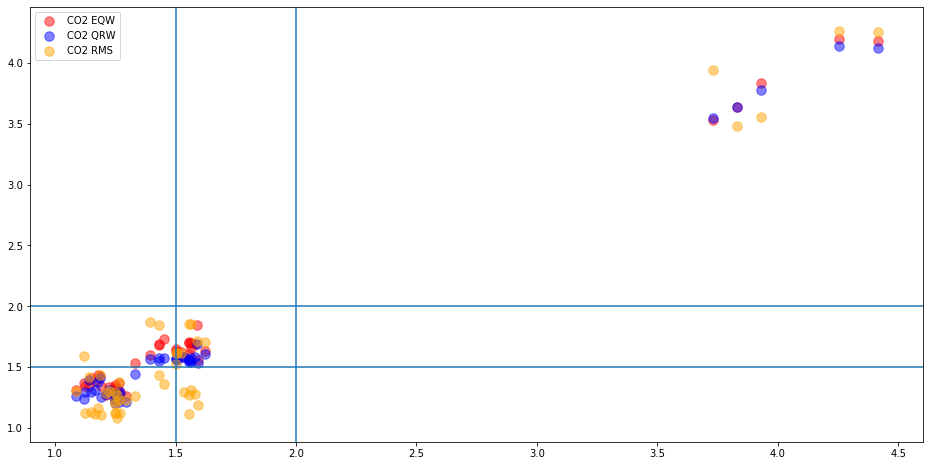

In [316]:
fig, axs = plt.subplots(ncols=1, figsize=(16, 8))
color_dict = {"CO2 EQW": "red", "CO2 QRW": "blue", "CO2 RMS": "orange"}
sizefactor = 90
for item in use_classes:
    plt.scatter(
        x="Orig", 
        y="value", 
        c=color_dict[item],
        s=sizefactor,
        alpha=0.5,
        data=orig_temp_cat[orig_temp_cat["infill"] == item]
    )
plt.legend(color_dict.keys())
for line in [1.5, 2]:
    plt.axhline(line)
    plt.axvline(line)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [320]:
count_cats = orig_temp_cat.copy()
count_cats["value"] = np.ceil(2 * count_cats["value"]) / 2
count_cats["Orig"] = np.ceil(2 * count_cats["Orig"]) / 2
counted_cats = count_cats.groupby(["infill", "value", "Orig"]).count()
counted_cats.reset_index(inplace=True)
counted_cats = counted_cats[counted_cats["infill"] != "Original"]
counted_cats

,infill,value,Orig,model,scenario
0,CO2 EQW,1.5,1.5,22,22
1,CO2 EQW,2.0,1.5,5,5
2,CO2 EQW,2.0,2.0,14,14
3,CO2 EQW,4.0,4.0,3,3
4,CO2 EQW,4.5,4.5,2,2
5,CO2 QRW,1.5,1.5,23,23
6,CO2 QRW,2.0,1.5,4,4
7,CO2 QRW,2.0,2.0,14,14
8,CO2 QRW,4.0,4.0,3,3
9,CO2 QRW,4.5,4.5,2,2


Now we repeat this process using the highest temperature at any point.

In [344]:
max_temp = all_temp_infills.groupby(["model", "scenario", "infill"]).max()
max_temp.head(10)

region  \
model       scenario                          infill                   
AIM/CGE 2.1 TERL_15D_LowCarbonTransportPolicy CO2 EQW          World   
                                              CO2 QRW          World   
                                              CO2 RMS          World   
                                              CO2 and CH4 EQW  World   
                                              CO2 and CH4 QRW  World   
                                              CO2 and CH4 RMS  World   
                                              Original         World   
            TERL_15D_NoTransportPolicy        CO2 EQW          World   
                                              CO2 QRW          World   
                                              CO2 RMS          World   

                                                                                                        variable  \
model       scenario                          infill                                                               
AIM/CGE 2.1 TERL_15D_LowCarbonTransportPolicy CO2 EQW          AR6 climate diagnostics|Surface Temperature (G...   
                                              CO2 QRW          AR6 climate diagnostics|Surface Temperature (G...   
                                              CO2 RMS          AR6 climate diagnostics|Surface Temperature (G...   
                                              CO2 and CH4 EQW  AR6 climate diagnostics|Surface Temperature (G...   
                                              CO2 and CH4 QRW  AR6 climate diagnostics|Surface Temperature (G...   
                                              CO2 and CH4 RMS  AR6 climate diagnostics|Surface Temperature (G...   
                                              Original         AR6 climate diagnostics|Surface Temperature (G...   
            TERL_15D_NoTransportPolicy        CO2 EQW          AR6 climate diagnostics|Surface Temperature (G...   
                                              CO2 QRW          AR6 climate diagnostics|Surface Temperature (G...   
                                              CO2 RMS          AR6 climate diagnostics|Surface Temperature (G...   

                                                              unit  year  \
model       scenario                          infill                       
AIM/CGE 2.1 TERL_15D_LowCarbonTransportPolicy CO2 EQW            K  2100   
                                              CO2 QRW            K  2100   
                                              CO2 RMS            K  2100   
                                              CO2 and CH4 EQW    K  2100   
                                              CO2 and CH4 QRW    K  2100   
                                              CO2 and CH4 RMS    K  2100   
                                              Original           K  2100   
            TERL_15D_NoTransportPolicy        CO2 EQW            K  2100   
                                              CO2 QRW            K  2100   
                                              CO2 RMS            K  2100   

                                                                  value  
model       scenario                          infill                     
AIM/CGE 2.1 TERL_15D_LowCarbonTransportPolicy CO2 EQW          1.665594  
                                              CO2 QRW          1.575674  
                                              CO2 RMS          1.557261  
                                              CO2 and CH4 EQW  1.707358  
                                              CO2 and CH4 QRW  1.560802  
                                              CO2 and CH4 RMS  1.611174  
                                              Original         1.511421  
            TERL_15D_NoTransportPolicy        CO2 EQW          1.721883  
                                              CO2 QRW          1.606374  
                                              CO2 RMS          1.570378

In [352]:
orig_temp_cat = max_temp.copy()
orig_temp_cat["Orig"] = np.nan
orig_temp_cat.reset_index(inplace=True)
for ind, row in orig_temp_cat.iterrows():
    orig_temp_cat["Orig"][ind] = orig_temp_cat["value"][
        (orig_temp_cat["model"] == row["model"]) & (orig_temp_cat["scenario"] == row["scenario"]) & (
            orig_temp_cat["infill"] == "Original"
        )
    ]
orig_temp_cat = orig_temp_cat[orig_temp_cat["infill"] != "Original"]
orig_temp_cat.head()

C:\Users\rlamboll\AppData\Local\Continuum\anaconda3\envs\silicone-5\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,model,scenario,infill,region,variable,unit,year,value,Orig
0,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,CO2 EQW,World,AR6 climate diagnostics|Surface Temperature (G...,K,2100,1.665594,1.511421
1,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,CO2 QRW,World,AR6 climate diagnostics|Surface Temperature (G...,K,2100,1.575674,1.511421
2,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,CO2 RMS,World,AR6 climate diagnostics|Surface Temperature (G...,K,2100,1.557261,1.511421
3,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,CO2 and CH4 EQW,World,AR6 climate diagnostics|Surface Temperature (G...,K,2100,1.707358,1.511421
4,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,CO2 and CH4 QRW,World,AR6 climate diagnostics|Surface Temperature (G...,K,2100,1.560802,1.511421


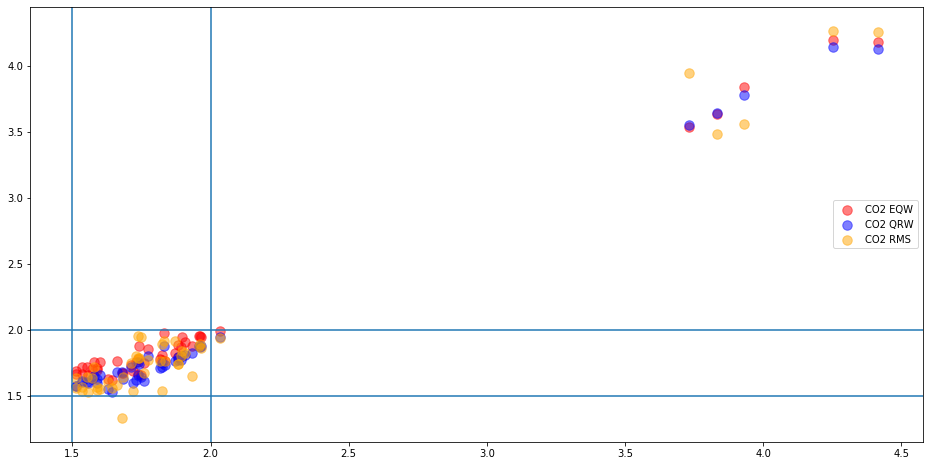

In [353]:
fig, axs = plt.subplots(ncols=1, figsize=(16, 8))
color_dict = {"CO2 EQW": "red", "CO2 QRW": "blue", "CO2 RMS": "orange"}
sizefactor = 90
for item in use_classes:
    plt.scatter(
        x="Orig", 
        y="value", 
        c=color_dict[item],
        s=sizefactor,
        alpha=0.5,
        data=orig_temp_cat[orig_temp_cat["infill"] == item]
    )
plt.legend(color_dict.keys())
for line in [1.5, 2]:
    plt.axhline(line)
    plt.axvline(line)

# Investigation - deletable

In [ ]:
g = sns.FacetGrid(dif_df_full, col="year", col_wrap=4)
g = g.map(plt.hist, "CO2 and CH4 QRW - Original")

In [ ]:
all_infilling.loc[("PFC|C6F14" in v for v in all_infilling.variable.values)]["value"].unique()

In [ ]:
all_infilling.loc[("PFC|C6F14" in v for v in all_infilling.variable.values)]

In [ ]:
plt.scatter(
    all_data.data.loc[
        (all_data["variable"] == "AR6 climate diagnostics|Infilled|Emissions|CO2") & (all_data["year"] == 2050)
    ]["value"],
    all_data.data.loc[
        (all_data["variable"] == "AR6 climate diagnostics|Infilled|Emissions|SF6") & (all_data["year"] == 2050)
    ]["value"]
)

In [ ]:
plt.scatter(
    infilled_qrw.data.loc[
        (infilled_qrw["variable"] == "AR6 climate diagnostics|Infilled|Emissions|CO2") & (infilled_qrw["year"] == 2050)
    ]["value"],
    infilled_qrw.data.loc[
        (infilled_qrw["variable"] == "AR6 climate diagnostics|Infilled|Emissions|SF6") & (infilled_qrw["year"] == 2050)
    ]["value"]
)

In [ ]:
min(infilled_qrw.data.loc[
    (infilled_qrw["variable"] == "AR6 climate diagnostics|Infilled|Emissions|SF6") & (infilled_qrw["year"] == 2050)
]["value"])

In [ ]:
min(all_data.data.loc[
    (all_data["variable"] == "AR6 climate diagnostics|Infilled|Emissions|SF6") & (all_data["year"] == 2050)
]["value"])